In [1]:
# petrol_consumption.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('datasets/petrol_consumption.csv')

In [4]:
df.shape

(48, 5)

In [5]:
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


##### Seperate the input and output data

In [7]:
x=df.drop('Petrol_Consumption',axis=1)
y=df['Petrol_Consumption']

In [8]:
x.corrwith(y)

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
dtype: float64

In [9]:
# here we don't have more than 80% correlation so we are not using linear regression


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Petrol_Consumption', ylabel='Density'>

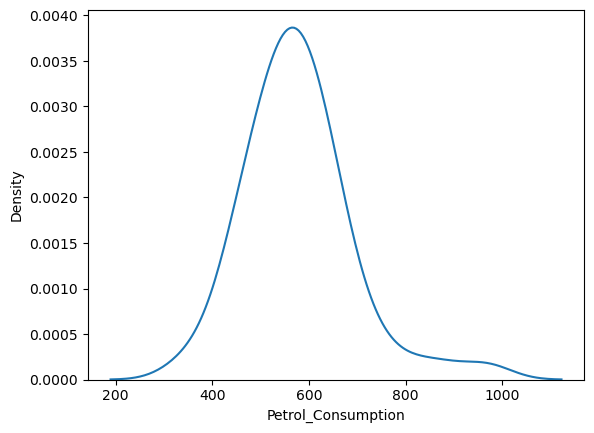

In [10]:
sns.kdeplot(y)

#### Cross Validation

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0)


In [14]:
x_train.shape, x_test. shape

((36, 4), (12, 4))

##### Build the model

In [18]:
from sklearn.tree import DecisionTreeRegressor# import the class for Regressor, when linearity is not present

In [27]:
regressor=DecisionTreeRegressor(random_state=0)

In [28]:
regressor.fit(x_train,y_train)# trained the algo

DecisionTreeRegressor(random_state=0)

##### Perofromance Evaluation

In [29]:
y_pred=regressor.predict(x_test)

In [30]:
result=pd.DataFrame({'Actual':y_test,
                     'Predict':y_pred
                    })
result

,Actual,Predict
29,534,541.0
4,410,498.0
26,577,628.0
30,571,628.0
32,577,628.0
37,704,644.0
34,487,628.0
40,587,649.0
7,467,414.0
10,580,464.0


In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [32]:
mean_absolute_error(y_test,y_pred)

68.08333333333333

In [33]:
mean_absolute_percentage_error(y_test,y_pred)

0.1294003614849453

In [36]:
np.sqrt(mean_squared_error(y_test,y_pred))

75.58604368532593

##### Visualize

In [38]:
from sklearn.tree import plot_tree

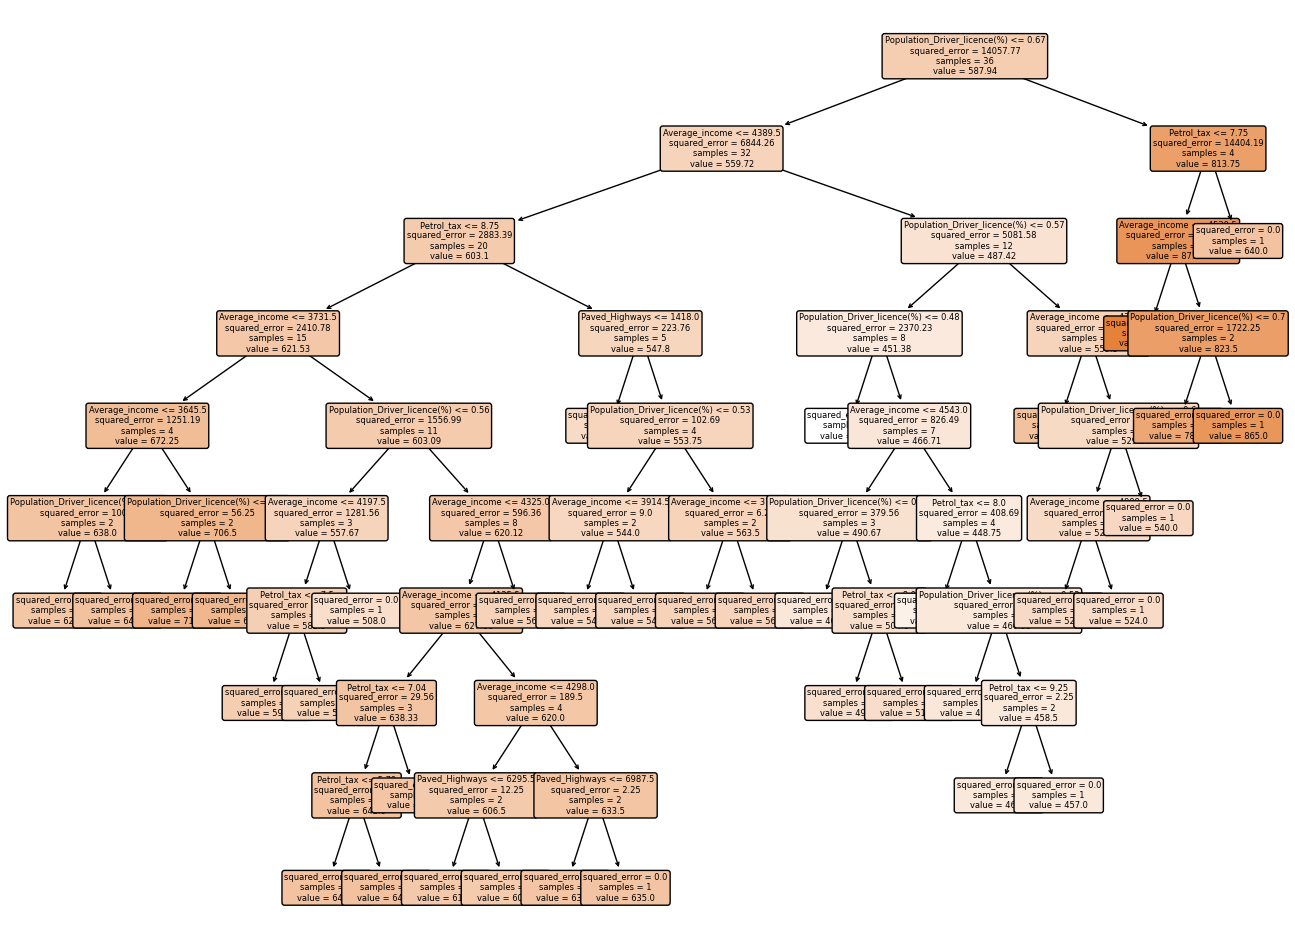

In [39]:
plt.figure(figsize=(16,12))
plot_tree(regressor, fontsize=6, feature_names=x.columns, filled=True, precision=2,rounded=True)
plt.savefig('tree.png')

<BarContainer object of 4 artists>

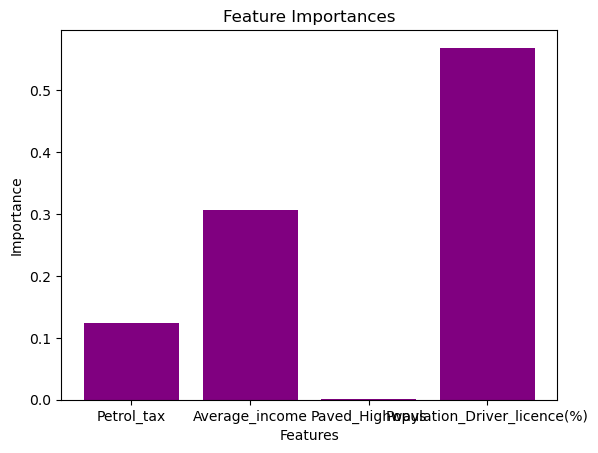

In [40]:
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(x.columns, regressor.feature_importances_,color='purple')

##### Prediction on new/unseen data

In [42]:
new=pd.DataFrame(data=[[7.3,4449,4639,0.626],[6.4,5215,2302,0.672]],columns=x.columns)

In [43]:
new

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,7.3,4449,4639,0.626
1,6.4,5215,2302,0.672


In [44]:
regressor.predict(new)

array([649., 782.])

In [46]:
regressor.feature_importances_ *100

array([12.36150682, 30.64515438,  0.14563906, 56.84769974])

In [47]:
# paved highway is not that much important

In [ ]:
# K-nearest Neighbour classification  (KNN algo) algo
# finding the close matching 
# nearest in similarit
# face detection
#  use Euclidean distance formula, distance from two points 
# it comes under lazy learner algo , because if we incerease the model size then speed becomes slow
# k value should not be less and should not be higher otherwise accuracy will be decrease
# it doesn't learn anything, here training faster but  prediction slow but others are oposite of this algo
# fast training , but classification is slow, 
# we can used it for classification and  regression